<a href="https://colab.research.google.com/github/Yumna10/Sentiment-Analysis-Data-Preparation/blob/main/Final_Data_Prepared_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Install and import the necessary libraries**


In [ ]:
!pip install datasets
!pip install wordcloud
!pip install nltk
!pip install palettable
!pip install clean-text

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.7/536.7 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.3/38.3 MB 29.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 18.4 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 10.0.1
    Uninstalling pyarrow-10.0.1:
      Successfully uninstalled pyarrow-10.0.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ibis-framework 7.1.0 requires pyarrow<15,>=2, but you have pyarrow 15.0.0 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from wordcloud import WordCloud
import plotly.express as px
from collections import Counter
from nltk.stem import WordNetLemmatizer
from cleantext import clean
import string
import re

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Load GoEmotions dataset fromhugging face

**Loading the 'go_emotions' dataset with the 'simplified' configuration from hugging face**

In [ ]:
go_emotions_dataset = load_dataset("go_emotions", "simplified")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/43410 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/5426 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/5427 [00:00<?, ? examples/s]

This dataset is split into three subsets: training, validation, and test. Each subset contains text data, corresponding labels, and an identifier ('id') for each entry.

The training set has 43,410 rows, the validation set has 5,426 rows, and the test set has 5,427 rows.

In [ ]:
go_emotions_dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'labels', 'id'],
        num_rows: 43410
    })
    validation: Dataset({
        features: ['text', 'labels', 'id'],
        num_rows: 5426
    })
    test: Dataset({
        features: ['text', 'labels', 'id'],
        num_rows: 5427
    })
})

creates separate variables for the text data and labels of the training, validation, and test subsets of the "go_emotions_dataset". Then, it consolidates the text data and labels from all subsets into a single Pandas DataFrame named "go_emotions_dataframe". This DataFrame has two columns: 'text' containing the textual data and 'labels' containing the corresponding labels.

Here's a breakdown of what each part of the code does:

1.Separating Data: It extracts text data and labels

1.   Separating Data: It extracts text data and labels from each subset of the dataset.
2.   Consolidating Data: It combines the text and labels from all subsets into a single DataFrame.
3. DataFrame Creation: It constructs a Pandas DataFrame using the combined text and labels.
Overall, this code snippet prepares the dataset for further analysis


> Overall, this code snippet prepares the dataset for further analysis



In [ ]:
# Combining train, validation, and test data into a single DataFrame
train_text = go_emotions_dataset['train']['text']
train_labels = go_emotions_dataset['train']['labels']

val_text = go_emotions_dataset['validation']['text']
val_labels = go_emotions_dataset['validation']['labels']

test_text = go_emotions_dataset['test']['text']
test_labels = go_emotions_dataset['test']['labels']

go_emotions_dataframe = pd.DataFrame({
    'text': train_text + val_text + test_text,
    'labels': train_labels + val_labels + test_labels
})

In [ ]:
go_emotions_dataframe.head(10)

,text,labels
0,My favourite food is anything I didn't have to...,[27]
1,"Now if he does off himself, everyone will thin...",[27]
2,WHY THE FUCK IS BAYLESS ISOING,[2]
3,To make her feel threatened,[14]
4,Dirty Southern Wankers,[3]
5,OmG pEyToN iSn'T gOoD eNoUgH tO hElP uS iN tHe...,[26]
6,Yes I heard abt the f bombs! That has to be wh...,[15]
7,We need more boards and to create a bit more s...,"[8, 20]"
8,Damn youtube and outrage drama is super lucrat...,[0]
9,It might be linked to the trust factor of your...,[27]


In [ ]:
# Define a mapping between numeric labels and emotional categories
label_mapping = { 0:'joy', 1:'joy', 2:'anger', 3:'anger', 4:'joy', 5:'joy',
                  6:'surprise',  7:'surprise', 8:'joy',  9:'sadness', 10:'anger',
                  11:'disgust', 12:'sadness', 13:'joy', 14:'fear', 15:'joy',
                  16:'sadness', 17:'joy', 18:'joy', 19:'fear', 20:'joy',
                  21:'joy', 22:'surprise', 23:'joy', 24:'sadness', 25:'sadness',
                  26:'surprise', 27:'neutral'}

# Replace numeric labels with text labels in the 'labels' column
def map_labels(label_list):
    return [label_mapping[label] for label in label_list]

# Apply the mapping function to the 'labels' column
go_emotions_dataframe['labels'] = go_emotions_dataframe['labels'].apply(map_labels)

"""
Access the 'labels' column of the DataFrame and convert each element to string
Then, extract the first character from each string to remove any leading or trailing whitespace
"""
go_emotions_dataframe['labels'] = go_emotions_dataframe['labels'].str[0].str.strip()

In [ ]:
go_emotions_dataframe

,text,labels
0,My favourite food is anything I didn't have to...,neutral
1,"Now if he does off himself, everyone will thin...",neutral
2,WHY THE FUCK IS BAYLESS ISOING,anger
3,To make her feel threatened,fear
4,Dirty Southern Wankers,anger
...,...,...
54258,Thanks. I was diagnosed with BP 1 after the ho...,joy
54259,Well that makes sense.,joy
54260,Daddy issues [NAME],neutral
54261,So glad I discovered that subreddit a couple m...,joy


# **Class for Visualizing the Data**

In [ ]:
class Analysis():
    def __init__(self, figsize=(12, 6)):
        self.figsize = figsize

    # Create pie chart
    def plot_bar_pie_chart(self, dataframe, column_name, explode, colors):
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=self.figsize)
        labels = list(dataframe[column_name].unique())
        sizes = list(dataframe[column_name].value_counts())
        # Bar chart
        ax1.bar(labels, sizes, color=colors)
        ax1.set_title('Distribution of Emotions')
        ax1.set_xlabel('Emotion')
        ax1.set_ylabel('Count')
        ax1.tick_params(axis='x', rotation=45)

        # Pie chart
        ax2.pie(sizes, labels=labels,explode=explode, colors=colors, autopct='%1.1f%%', startangle=90)
        ax2.set_title('Distribution of Emotions')

        # Show plot
        plt.tight_layout()
        plt.show()

    def create_label_counts_df(self, dataframe, column_name):
        """
        Creates a DataFrame displaying the counts of each unique label in a specified column of a DataFrame.

        Parameters:
            dataframe (pd.DataFrame): The DataFrame containing the data.
            column_name (str): The name of the column containing the labels.

        Returns:
            pd.DataFrame: A DataFrame displaying the counts of each unique label.
        """
        label_counts_df = dataframe[column_name].value_counts().reset_index()
        label_counts_df.columns = ['emotion', 'count']
        return label_counts_df.transpose()  # Transpose the DataFrame

    def __call__ (self, dataframe, column_name, explode, colors):
        display(dataframe.head(10))
        print("-"*55)
        display(self.create_label_counts_df(dataframe, column_name))
        self.plot_bar_pie_chart(dataframe, column_name, explode, colors)

analysis = Analysis(figsize=(12, 6))

,text,labels
0,My favourite food is anything I didn't have to...,neutral
1,"Now if he does off himself, everyone will thin...",neutral
2,WHY THE FUCK IS BAYLESS ISOING,anger
3,To make her feel threatened,fear
4,Dirty Southern Wankers,anger
5,OmG pEyToN iSn'T gOoD eNoUgH tO hElP uS iN tHe...,surprise
6,Yes I heard abt the f bombs! That has to be wh...,joy
7,We need more boards and to create a bit more s...,joy
8,Damn youtube and outrage drama is super lucrat...,joy
9,It might be linked to the trust factor of your...,neutral


-------------------------------------------------------


,0,1,2,3,4,5,6
emotion,joy,neutral,anger,surprise,sadness,fear,disgust
count,21171,16021,6724,5584,3235,790,738


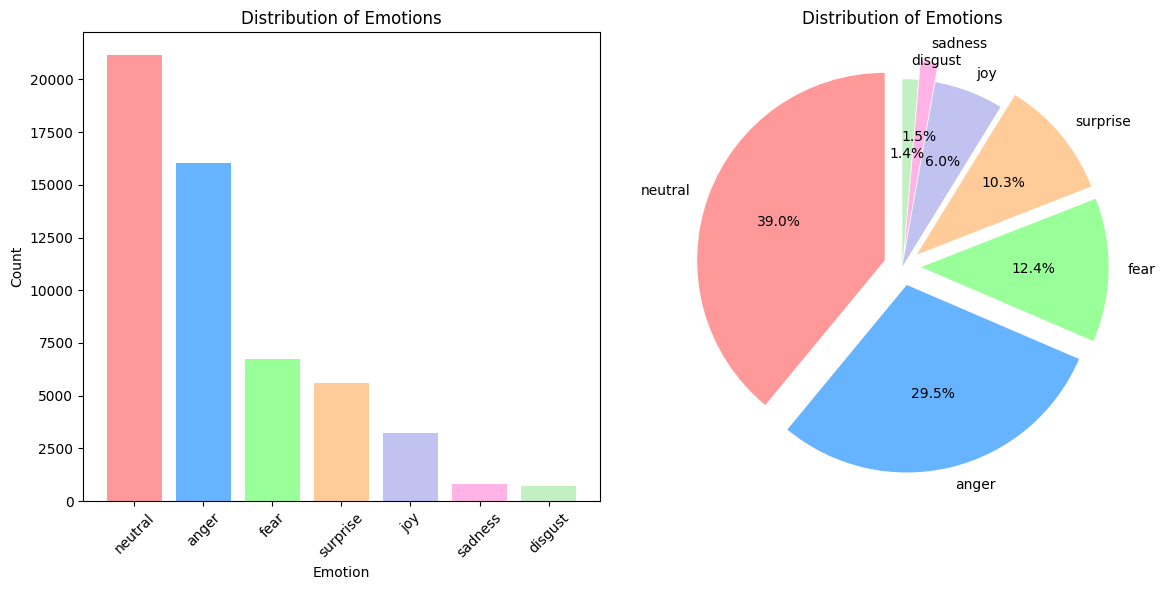

In [ ]:
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6','#c2f0c2']
explode = (0.1, 0.1, 0.1, 0.1, 0, 0.1, 0)
analysis(go_emotions_dataframe,
         'labels', explode, colors)

> Based on the analysis conducted on the dataset (GoEmotion), it is evident that an imbalance exists among the classes subsequent to the consolidation of certain categories. For instance, the 'joy' category exhibits a significantly higher count of 21,171 instances, while 'fear' and 'disgust' categories manifest considerably lower counts, approximately 790 and 738 instances respectively. This disparity in class distribution may result in biases towards categories with higher representation, potentially impacting the effectiveness of subsequent analyses or models trained on this data. Consequently, it is imperative to address this issue of class imbalance in order to ensure the robustness and reliability of the data-driven insights derived from the dataset.



# **Load other Dataset**

In [ ]:
emotion_classif = pd.read_csv("/content/Emotion_classify_Data.csv")
emotion_final = pd.read_csv("/content/Emotion_final.csv")
emotion_tweets = pd.read_csv("/content/tweet_emotions.csv")
emotion_merged = pd.read_csv("/content/merged.csv")
dataset_dir_ai = pd.read_pickle("merged_training.pkl")

,text,emotions
27383,i feel awful about it too because it s my job ...,sadness
110083,im alone i feel awful,sadness
140764,ive probably mentioned this before but i reall...,joy
100071,i was feeling a little low few days back,sadness
2837,i beleive that i am much more sensitive to oth...,love
18231,i find myself frustrated with christians becau...,love
10714,i am one of those people who feels like going ...,joy
35177,i feel especially pleased about this as this h...,joy
122177,i was struggling with these awful feelings and...,joy
26723,i feel so enraged but helpless at the same time,anger


-------------------------------------------------------


,0,1,2,3,4,5
emotion,joy,sadness,anger,fear,love,surprise
count,141067,121187,57317,47712,34554,14972


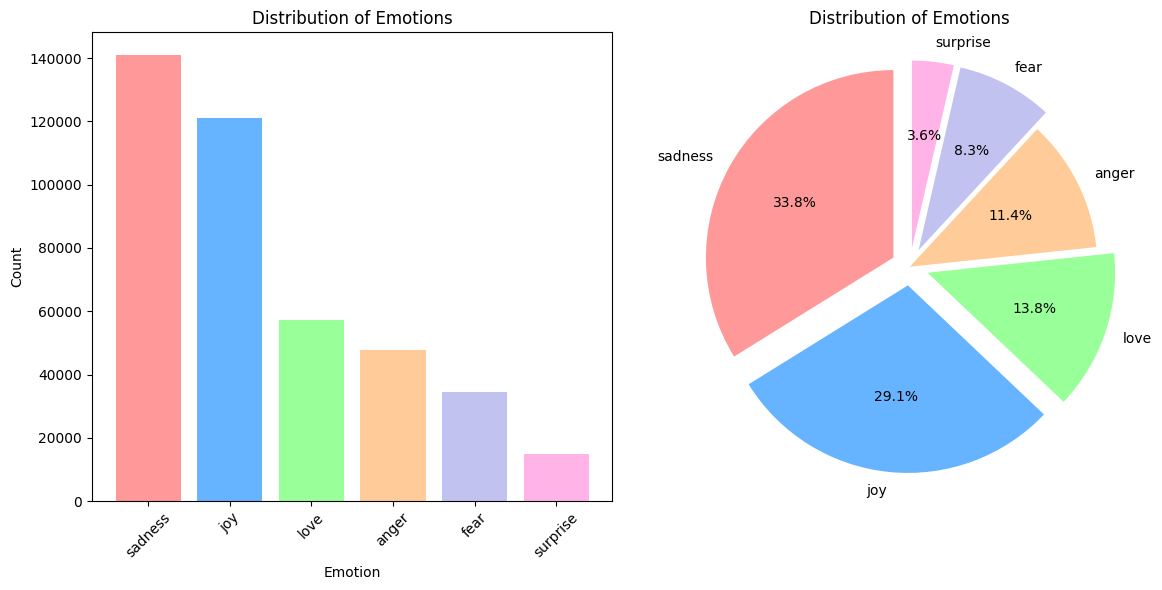

In [ ]:
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6']

explode = (0.1, 0.1, 0.1, 0, 0.1, 0.1)

analysis(dataset_dir_ai, 'emotions', explode, colors)

The analysis presents the distribution of emotions within a dataset, showcasing the counts for each emotion category. Below are the key observations derived from the analysis:

1. Joy: with the highest count of 141,067 instances, the 'joy' emotion category dominates the dataset, indicating a prevalent presence of positive emotions.

2. Sadness: following 'joy', the 'sadness' category stands out with a significant count of 121,187 instances, suggesting a considerable representation of negative emotions.

3. Anger: the 'anger' category exhibits a lower count compared to 'joy' and 'sadness', with 57,317 instances, indicating a relatively lower prevalence of this emotion in the dataset.

4. Fear: similarly, the 'fear' category shows a count of 47,712 instances, reflecting a moderate presence of this emotion within the dataset.

5. Love: Interestingly, the 'love' category, although not as prevalent as 'joy' and 'sadness', still demonstrates a substantial count of 34,554 instances, indicating the presence of positive emotions related to affection and attachment.

6. Surprise: finally, the 'surprise' category appears to be the least represented emotion in the dataset, with 14,972 instances, suggesting a relatively lower occurrence of unexpected or startled reactions.


In [ ]:
# This code snippet aims to address class imbalance issues in the dataset
# by creating a balanced dataset through subsampling. It follows these steps:
# 1. Define the desired sample size per class.
# 2. Group the dataset by the emotion classes.
# 3. Define a sampling function to ensure a balanced representation of each class.
# 4. Apply the sampling function to each group and concatenate the results.
# 5. Reset the index to ensure a clean, continuous index without gaps.
# 6. Shuffle the rows randomly to achieve randomness and uniform distribution of samples.

sample_size_per_class = 14000
# Group the DataFrame by the 'class' column
dataset_dir_ai = dataset_dir_ai.groupby('emotions', group_keys=False)
# Define a function to sample from each group
def sample_group(group):
    return group.sample(min(sample_size_per_class, len(group)))

# Apply the sampling function to each group and concatenate the results
dataset_dir_ai = dataset_dir_ai.apply(sample_group)
# Reset the index of the resulting DataFrame
dataset_dir_ai = dataset_dir_ai.reset_index(drop=True)
dataset_dir_ai = dataset_dir_ai.sample(frac=1).reset_index(drop=True)

,text,emotions
0,i am feeling shy so pardon if i had to blur ma...,fear
1,i get this feeling in my stomach and my heart ...,surprise
2,i feel curious question,surprise
3,i feel weve all had friends who have fucked ou...,anger
4,i feel more than a little overwhelmed,surprise
5,i don t feel the comment is contextually hateful,anger
6,i couldn t help but feel aggravated at the arr...,anger
7,i feel like such a little whiney kid and that ...,sadness
8,i feel nervous in my first experience to ride ...,fear
9,im feeling a bit generous,love


-------------------------------------------------------


,0,1,2,3,4,5
emotion,fear,surprise,anger,sadness,love,joy
count,14000,14000,14000,14000,14000,14000


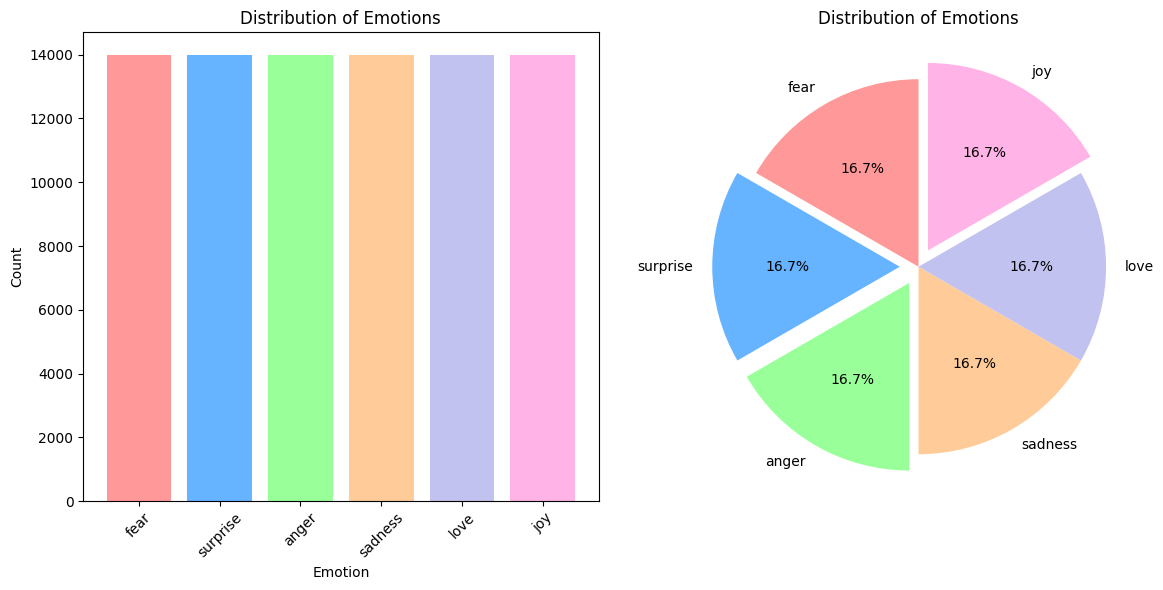

In [ ]:
explode = (0, 0.1, 0.1, 0, 0, 0.1)
analysis(dataset_dir_ai, 'emotions', explode, colors)

In this context, a systematic approach is undertaken to address the class imbalance inherent in GoEmotion dataset by randomly sampling a substantial number of instances to dir-ai-emotion dataset. Specifically, a total of 14,000 examples are drawn uniformly from the available data, ensuring an equitable representation across all emotion categories. This deliberate sampling strategy aims to rectify the imbalance in class distribution, thereby fostering a dataset characterized by nearly uniform class proportions. By employing this methodology, the resultant dataset closely approximates a balanced distribution among the various emotional states, thereby enhancing the dataset's suitability for subsequent analyses and modeling endeavors.

,Comment,Emotion
0,i seriously hate one subject to death but now ...,fear
1,im so full of life i feel appalled,anger
2,i sit here to write i start to dig out my feel...,fear
3,ive been really angry with r and i feel like a...,joy
4,i feel suspicious if there is no one outside l...,fear
5,i feel jealous becasue i wanted that kind of l...,anger
6,when a friend of mine keeps telling me morbid ...,anger
7,i finally fell asleep feeling angry useless an...,anger
8,i feel a bit annoyed and antsy in a good way,anger
9,i feel like i ve regained another vital part o...,joy


-------------------------------------------------------


,0,1,2
emotion,anger,joy,fear
count,2000,2000,1937


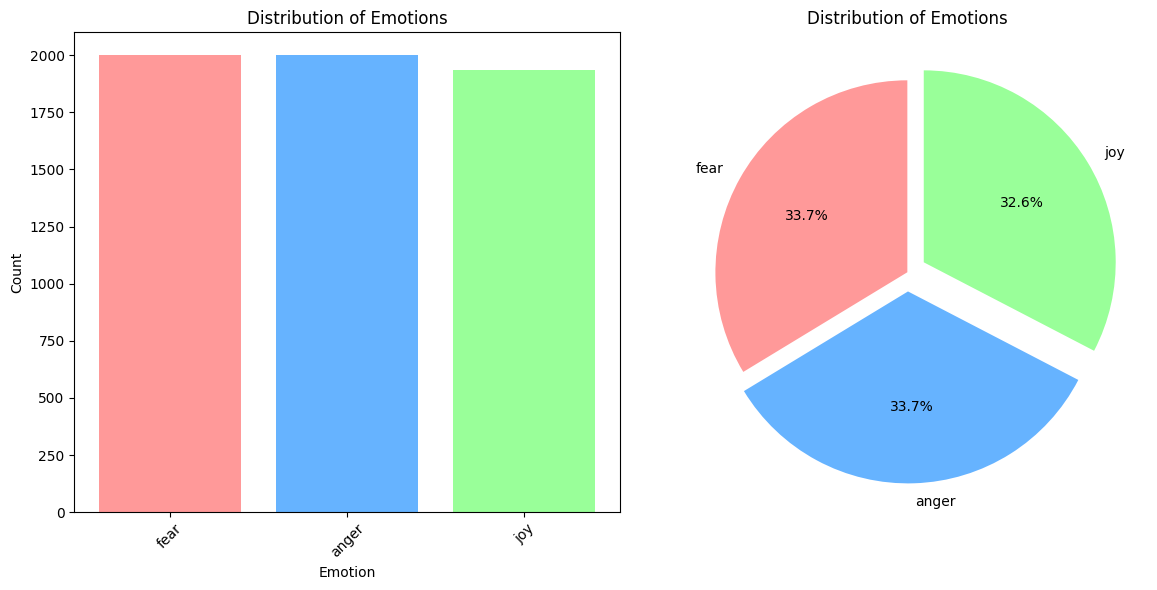

In [ ]:
colors = ['#ff9999','#66b3ff','#99ff99']
explode = (0, 0.1, 0.1)

analysis(emotion_classif, 'Emotion', explode, colors)

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
5,ive been feeling a little burdened lately wasn...,sadness
6,ive been taking or milligrams or times recomme...,surprise
7,i feel as confused about life as a teenager or...,fear
8,i have been with petronas for years i feel tha...,happy
9,i feel romantic too,love


-------------------------------------------------------


,0,1,2,3,4,5
emotion,happy,sadness,anger,fear,love,surprise
count,7029,6265,2993,2652,1641,879


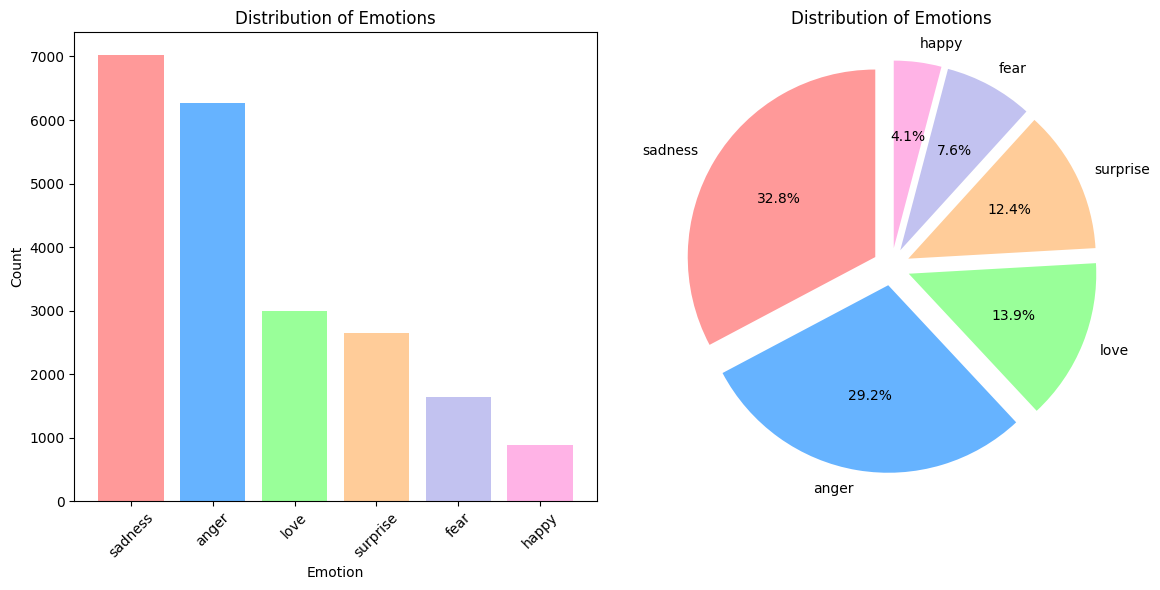

In [ ]:
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6']
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1)
analysis(emotion_final, 'Emotion', explode, colors)

The dataset contains counts for six different emotions: 'happy', 'sadness', 'anger', 'fear', 'love', and 'surprise', with counts of 7,029, 6,265, 2,993, 2,652, 1,641, and 879 instances, respectively. 'Happy' and 'sadness' are the most prevalent emotions, followed by 'anger' and 'fear'. 'Love' and 'surprise' have the lowest counts in the dataset. Overall, the dataset reflects a diverse distribution of emotions, encompassing both positive and negative emotional states.

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...
5,1956968477,worry,Re-pinging @ghostridah14: why didn't you go to...
6,1956968487,sadness,"I should be sleep, but im not! thinking about ..."
7,1956968636,worry,Hmmm. http://www.djhero.com/ is down
8,1956969035,sadness,@charviray Charlene my love. I miss you
9,1956969172,sadness,@kelcouch I'm sorry at least it's Friday?


-------------------------------------------------------


,0,1,2,3,4,5,6,7,8,9,10,11,12
emotion,neutral,worry,happiness,sadness,love,surprise,fun,relief,hate,empty,enthusiasm,boredom,anger
count,8638,8459,5209,5165,3842,2187,1776,1526,1323,827,759,179,110


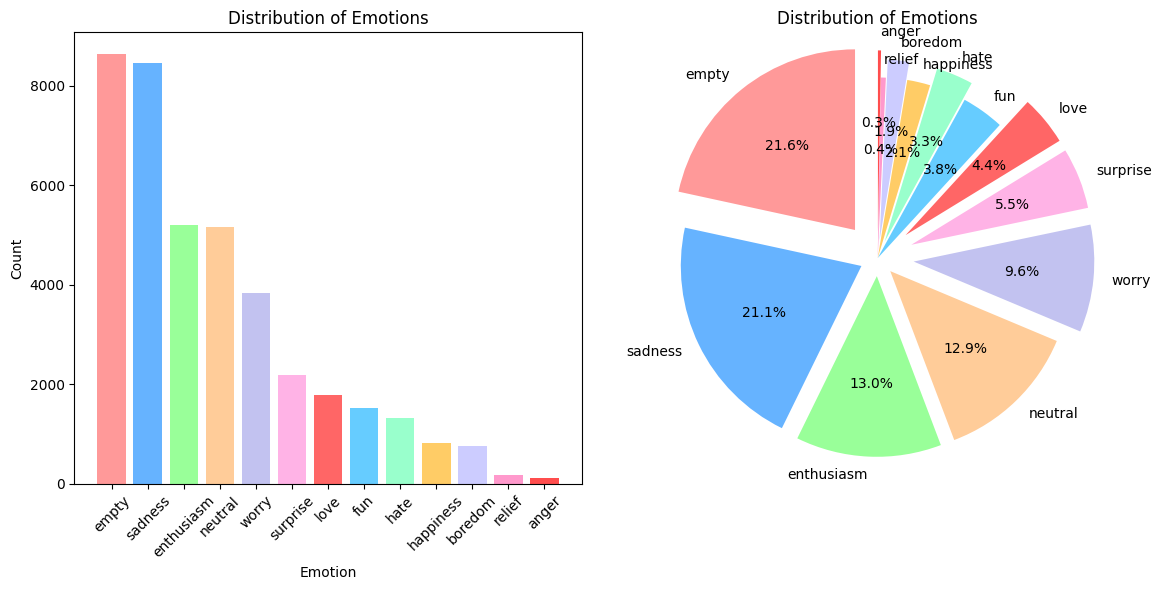

In [ ]:
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#ff6666', '#66ccff', '#99ffcc', '#ffcc66', '#ccccff', '#ff99cc', '#ff4d4d']
explode = (0.2, 0.1, 0.1, 0.1, 0.2, 0.2, 0.2, 0, 0.1, 0, 0.1, 0, 0.15)

analysis(emotion_tweets,'sentiment', explode, colors)

The data provides counts for various emotions expressed within a specific context. The emotions range from neutral to worry, happiness, sadness, love, surprise, fun, relief, hate, empty, enthusiasm, boredom, and anger. "Neutral" is the most frequently observed emotion, followed closely by "worry" and "happiness." "Anger" and "boredom" are among the least expressed emotions in the dataset.

,text,label
0,im feeling rather rotten so im not very ambiti...,sadness
1,im updating my blog because i feel shitty,sadness
2,i never make her separate from me because i do...,sadness
3,i left with my bouquet of red and yellow tulip...,joy
4,i was feeling a little vain when i did this one,sadness
5,i cant walk into a shop anywhere where i do no...,fear
6,i felt anger when at the end of a telephone call,anger
7,i explain why i clung to a relationship with a...,joy
8,i like to have the same breathless feeling as ...,joy
9,i jest i feel grumpy tired and pre menstrual w...,anger


-------------------------------------------------------


,0,1,2,3,4,5
emotion,joy,sadness,anger,fear,love,5
count,6057,5247,2434,2161,1463,638


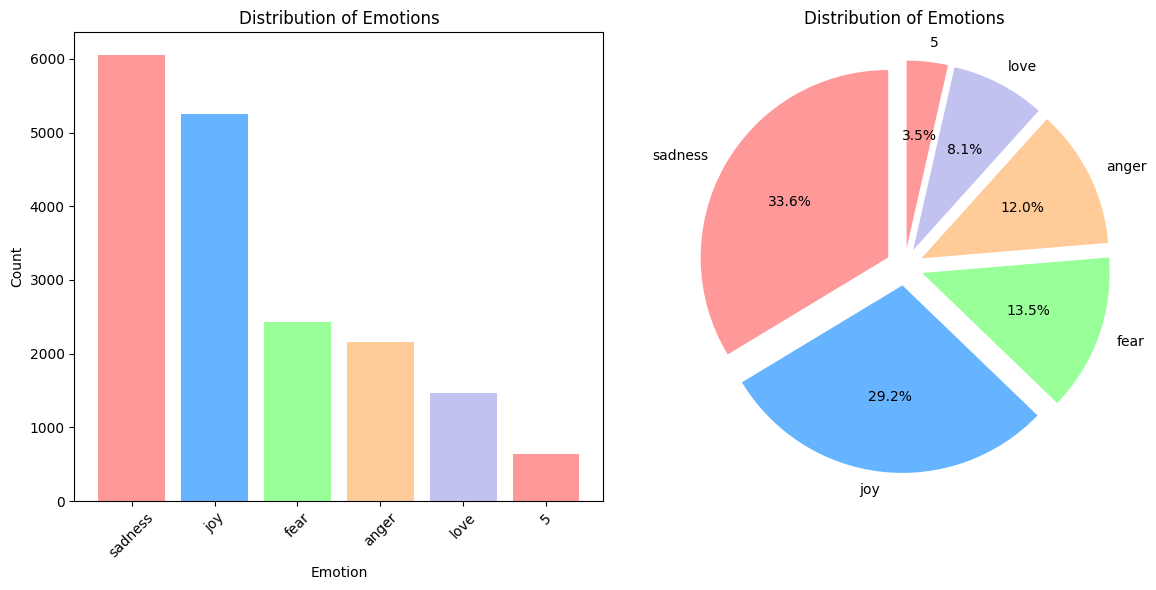

In [ ]:
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1)

analysis(emotion_merged, 'label', explode, colors)


The data presents the frequency of five emotions: joy, sadness, anger, fear, and love. Joy is the most prevalent emotion, occurring 6057 times, followed by sadness with 5247 occurrences. Anger and fear are less frequent, recorded at 2434 and 2161 instances respectively. Love is the least expressed emotion, appearing only 638 times. This data analysis sheds light on the emotional landscape of the context, emphasizing the prominence of joy and sadness.

# **Combine the selected emotion:**

1.   joy
2.   neutral
3.   surprise
4.   anger
5.   sadness
6.   fear


Some modifications are made to standardize the names of columns across different DataFrames, and specific emotions are selected by filtering the DataFrames accordingly.


In [ ]:
def Get_Emotions(data_frame, Emotions):
  # Filter the DataFrame based on the values in the 'emotion' column
  # Keep only the rows where the 'emotion' column contains one of the emotions specified in the Emotions list
  data_frame = data_frame[data_frame['emotion'].isin(Emotions)]
  return data_frame

In [ ]:
# Define a list of selected emotions that you want to filter
selected_emotions = ['surprise', 'anger', 'sadness', 'fear']
# Define a list of emotions we want it
go_emotions_dataframe_selected = ['joy','neutral','surprise', 'anger', 'sadness', 'fear']

In [ ]:
# Renaming columns in various DataFrames to standardize column names
# for consistency across different datasets.
emotion_classif = emotion_classif.rename(columns={'Emotion': 'emotion', 'Comment':'text'})
emotion_final = emotion_final.rename(columns={'Emotion': 'emotion', 'Text':'text'})
emotion_tweets = emotion_tweets.rename(columns={'sentiment': 'emotion', 'content':'text'})
emotion_merged = emotion_merged.rename(columns={'label': 'emotion'})
go_emotions_dataframe = go_emotions_dataframe.rename(columns={'labels': 'emotion'})
dataset_dir_ai = dataset_dir_ai.rename(columns={'emotions': 'emotion'})

# Filtering each DataFrame based on the selected emotions list.
# This step is likely to retain only the rows corresponding to the selected emotions.
go_emotions_dataframe = Get_Emotions(go_emotions_dataframe, go_emotions_dataframe_selected)
emotion_classif = Get_Emotions(emotion_classif, selected_emotions)
emotion_final = Get_Emotions(emotion_final, selected_emotions)
emotion_tweets = Get_Emotions(emotion_tweets, selected_emotions)
emotion_merged = Get_Emotions(emotion_merged, selected_emotions)
dataset_dir_ai = Get_Emotions(dataset_dir_ai, selected_emotions)

Visualize the data after our modification

,text,emotion
0,i am feeling shy so pardon if i had to blur ma...,fear
1,i get this feeling in my stomach and my heart ...,surprise
2,i feel curious question,surprise
3,i feel weve all had friends who have fucked ou...,anger
4,i feel more than a little overwhelmed,surprise
5,i don t feel the comment is contextually hateful,anger
6,i couldn t help but feel aggravated at the arr...,anger
7,i feel like such a little whiney kid and that ...,sadness
8,i feel nervous in my first experience to ride ...,fear
10,i cried and as ever feel more confused by thin...,fear


-------------------------------------------------------


,0,1,2,3
emotion,fear,surprise,anger,sadness
count,14000,14000,14000,14000


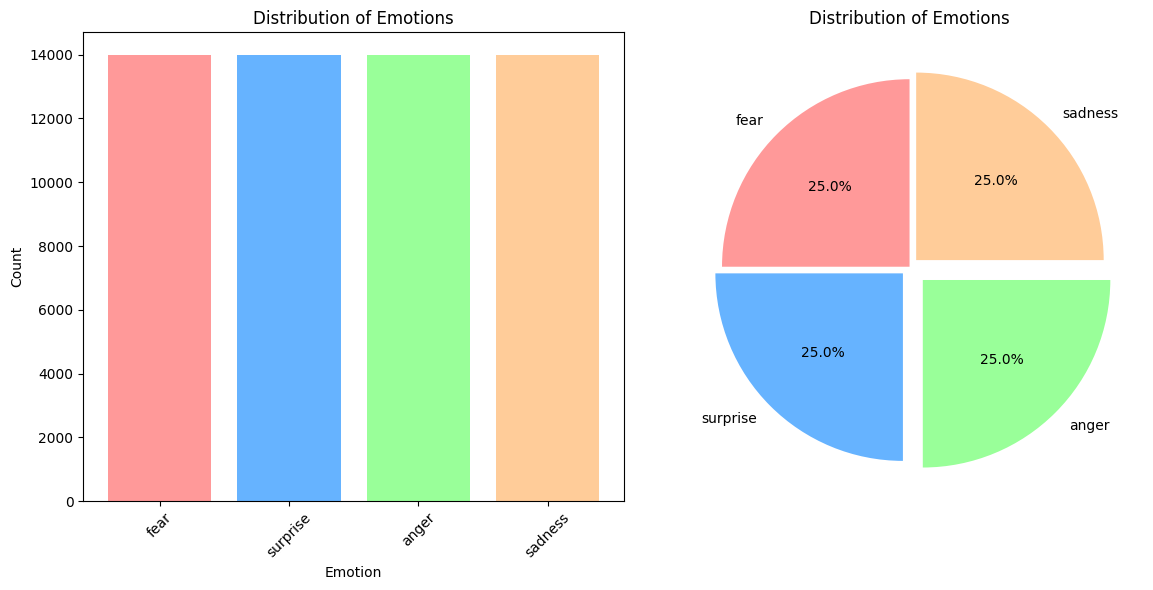

In [ ]:
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6']
explode = (0, 0.05, 0.1, 0.05)

analysis(dataset_dir_ai,'emotion',explode, colors)

,text,emotion
0,i seriously hate one subject to death but now ...,fear
1,im so full of life i feel appalled,anger
2,i sit here to write i start to dig out my feel...,fear
4,i feel suspicious if there is no one outside l...,fear
5,i feel jealous becasue i wanted that kind of l...,anger
6,when a friend of mine keeps telling me morbid ...,anger
7,i finally fell asleep feeling angry useless an...,anger
8,i feel a bit annoyed and antsy in a good way,anger
12,i was bitten by a dog,fear
14,i just try not to talk to anyone when i feel i...,anger


-------------------------------------------------------


,0,1
emotion,anger,fear
count,2000,1937


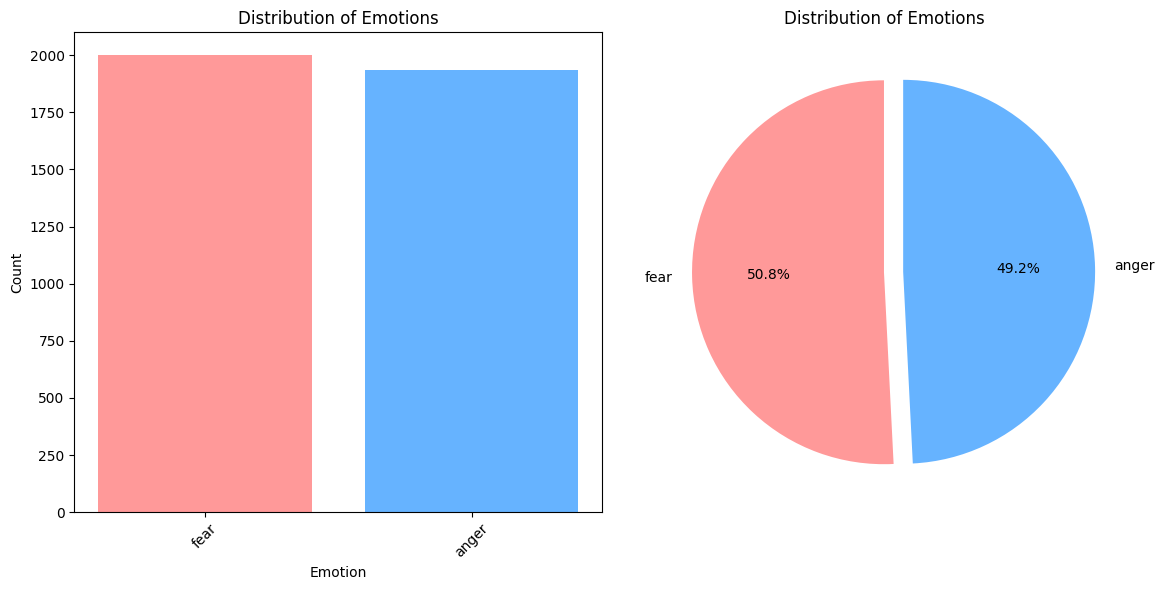

In [ ]:
colors = ['#ff9999','#66b3ff','#99ff99']
explode = (0, 0.1,)
analysis(emotion_classif,'emotion', explode, colors)

,text,emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
4,i am feeling grouchy,anger
5,ive been feeling a little burdened lately wasn...,sadness
6,ive been taking or milligrams or times recomme...,surprise
7,i feel as confused about life as a teenager or...,fear
10,i feel like i have to make the suffering i m s...,sadness
12,i think it s the easiest time of year to feel ...,anger
13,i feel low energy i m just thirsty,sadness


-------------------------------------------------------


,0,1,2,3
emotion,sadness,anger,fear,surprise
count,6265,2993,2652,879


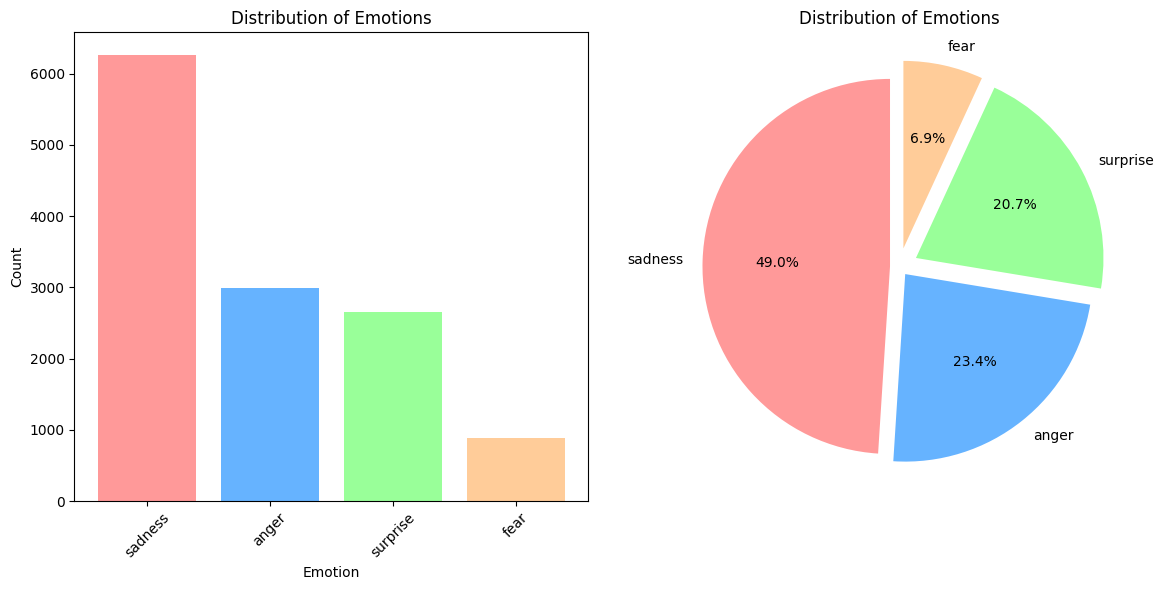

In [ ]:
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6']
explode = (0.05, 0.05, 0.1, 0.1)

analysis(emotion_final,'emotion', explode, colors)


,tweet_id,emotion,text
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
6,1956968487,sadness,"I should be sleep, but im not! thinking about ..."
8,1956969035,sadness,@charviray Charlene my love. I miss you
9,1956969172,sadness,@kelcouch I'm sorry at least it's Friday?
12,1956970047,sadness,Ugh! I have to beat this stupid song to get to...
13,1956970424,sadness,@BrodyJenner if u watch the hills in london u ...
14,1956970860,surprise,Got the news
15,1956971077,sadness,The storm is here and the electricity is gone
17,1956971206,sadness,So sleepy again and it's not even that late. I...


-------------------------------------------------------


,0,1,2
emotion,sadness,surprise,anger
count,5165,2187,110


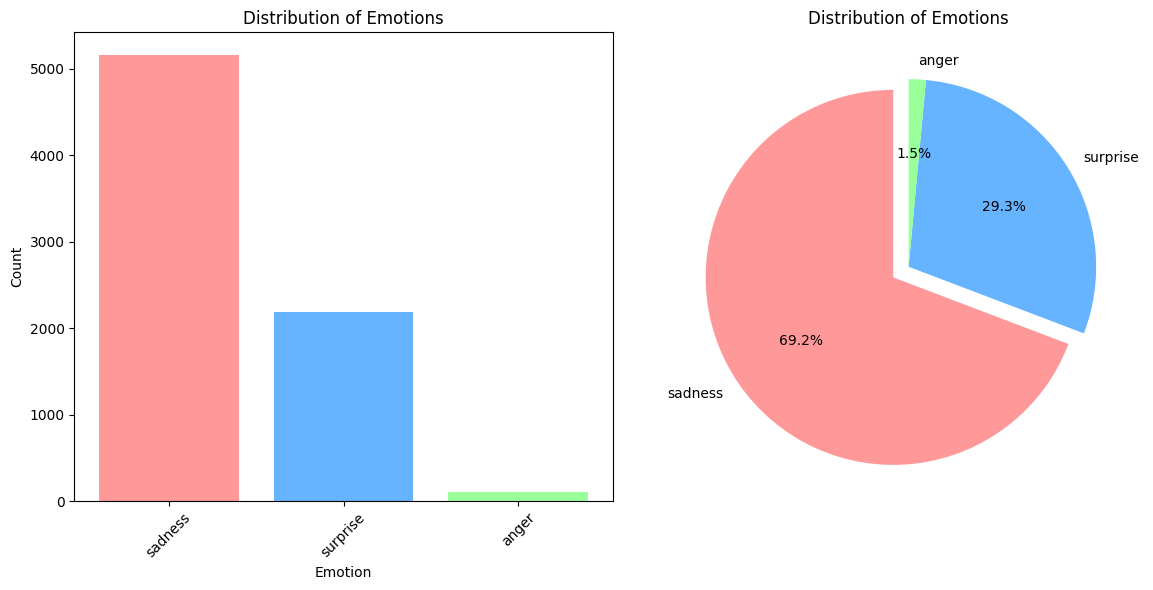

In [ ]:
colors = ['#ff9999', '#66b3ff', '#99ff99']
explode = (0.1, 0.0, 0.0)

analysis(emotion_tweets, 'emotion', explode, colors)

,text,emotion
0,im feeling rather rotten so im not very ambiti...,sadness
1,im updating my blog because i feel shitty,sadness
2,i never make her separate from me because i do...,sadness
4,i was feeling a little vain when i did this one,sadness
5,i cant walk into a shop anywhere where i do no...,fear
6,i felt anger when at the end of a telephone call,anger
9,i jest i feel grumpy tired and pre menstrual w...,anger
10,i don t feel particularly agitated,fear
11,i feel beautifully emotional knowing that thes...,sadness
12,i pay attention it deepens into a feeling of b...,fear


-------------------------------------------------------


,0,1,2
emotion,sadness,anger,fear
count,5247,2434,2161


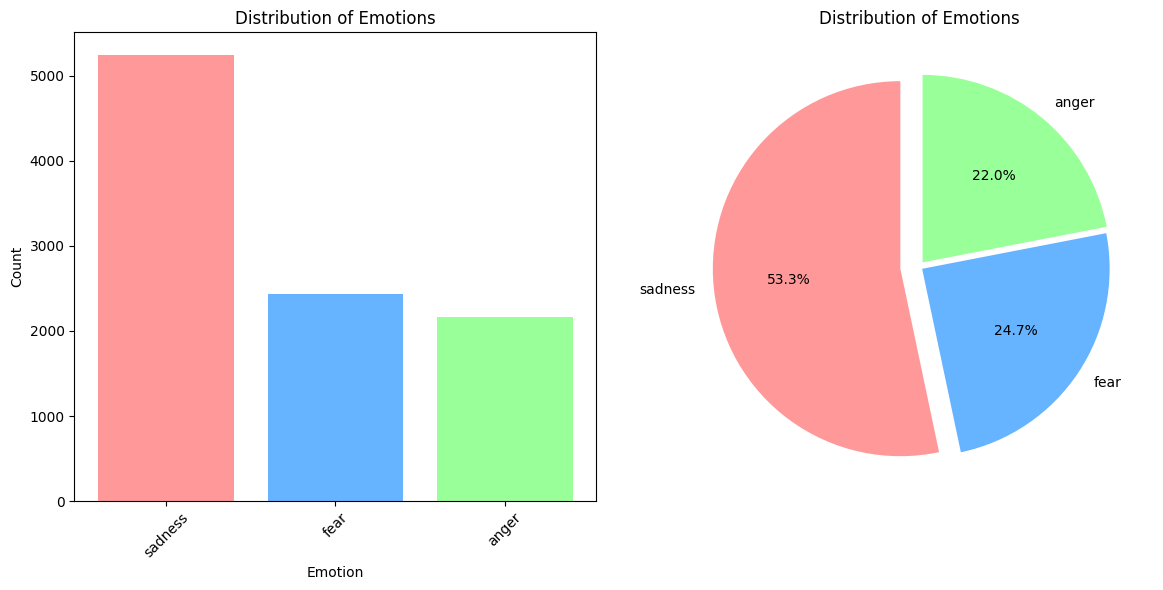

In [ ]:
colors = ['#ff9999', '#66b3ff', '#99ff99']
explode = (0.1, 0.02, 0.03)

analysis(emotion_merged,'emotion', explode, colors)

In [ ]:
Dataframe_lists = [go_emotions_dataframe,dataset_dir_ai, emotion_final, emotion_classif, emotion_tweets, emotion_merged]
full_Data = pd.concat(Dataframe_lists, ignore_index=True)

In [ ]:
full_Data.drop(columns='tweet_id', inplace=True)

# **Expolarity Data Analysis (EDA)**

In [ ]:
full_Data

,text,emotion
0,My favourite food is anything I didn't have to...,neutral
1,"Now if he does off himself, everyone will thin...",neutral
2,WHY THE FUCK IS BAYLESS ISOING,anger
3,To make her feel threatened,fear
4,Dirty Southern Wankers,anger
...,...,...
143550,i moved away he said something that made me fe...,anger
143551,i just had a very brief time in the beanbag an...,sadness
143552,i am now turning and i feel pathetic that i am...,sadness
143553,i feel like this was such a rude comment and i...,anger


In [ ]:
full_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143555 entries, 0 to 143554
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   text     143555 non-null  object
 1   emotion  143555 non-null  object
dtypes: object(2)
memory usage: 2.2+ MB


**Get the count of each emotion we have in our dataset**

In [ ]:
pd.DataFrame(full_Data['emotion'].value_counts()).rename(columns={'emotion': 'Count'})

,Count
sadness,33912
anger,28261
surprise,22650
fear,21540
joy,21171
neutral,16021


**Get the sum of duplicated rows and drop them**

In [ ]:
pd.DataFrame({'Count': [full_Data['text'].duplicated().sum()]})

,Count
0,18379


In [ ]:
full_Data.drop_duplicates(subset='text', inplace=True)
# Remove rows with empty or NaN values in the 'text' column
full_Data.dropna(subset=['text'], inplace=True)

In [ ]:
pd.DataFrame({'Count': [full_Data['text'].duplicated().sum()]})

,Count
0,0


**Show new Columns for the Count of each Emotion and the Count of Unique Values**




In [ ]:
pd.DataFrame(full_Data['emotion'].value_counts()).rename(columns={'emotion': 'Count'})

,Count
sadness,27845
anger,22966
surprise,21438
joy,21004
neutral,15973
fear,15950


In [ ]:
pd.DataFrame(full_Data.nunique(), columns=['Count of Unique Values'])

,Count of Unique Values
text,125176
emotion,6


**Calculate the word count, character count, average word length, stopwords count, hashtags count, numeric count, and uppercase words count for each text entry.
Subsequently, create visualizations for these metrics.**


In [ ]:
#Number of Words
full_Data['word_count'] = full_Data['text'].apply(lambda x: len(str(x).split(" ")))
full_Data[['text','word_count']].head()

,text,word_count
0,My favourite food is anything I didn't have to...,11
1,"Now if he does off himself, everyone will thin...",20
2,WHY THE FUCK IS BAYLESS ISOING,6
3,To make her feel threatened,5
4,Dirty Southern Wankers,3


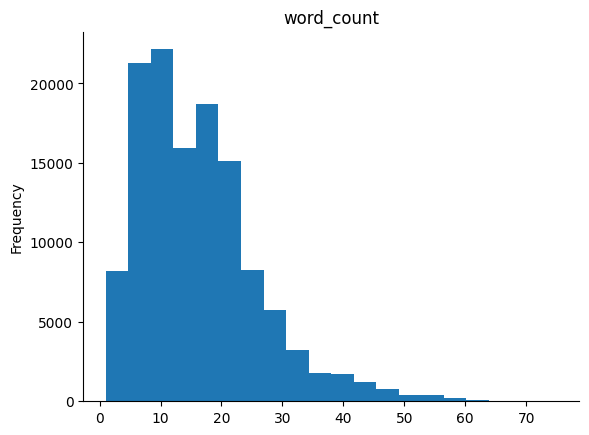

In [ ]:
full_Data['word_count'].plot(kind='hist', bins=20, title='word_count')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
#Number of characters

full_Data['char_count'] = full_Data['text'].str.len() ## this also includes spaces
full_Data[['text','char_count']].head()

,text,char_count
0,My favourite food is anything I didn't have to...,59
1,"Now if he does off himself, everyone will thin...",112
2,WHY THE FUCK IS BAYLESS ISOING,30
3,To make her feel threatened,27
4,Dirty Southern Wankers,22


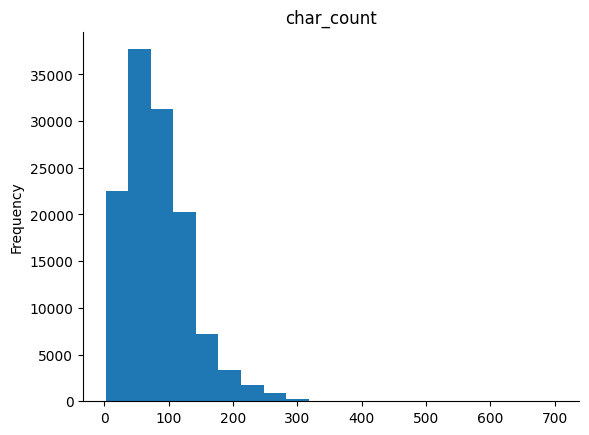

In [ ]:
full_Data['char_count'].plot(kind='hist', bins=20, title='char_count')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
#Average Word Length

def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))

full_Data['avg_word'] = full_Data['text'].apply(lambda x: avg_word(x))
full_Data[['text','avg_word']].head()

,text,avg_word
0,My favourite food is anything I didn't have to...,4.454545
1,"Now if he does off himself, everyone will thin...",4.650000
2,WHY THE FUCK IS BAYLESS ISOING,4.166667
3,To make her feel threatened,4.600000
4,Dirty Southern Wankers,6.666667


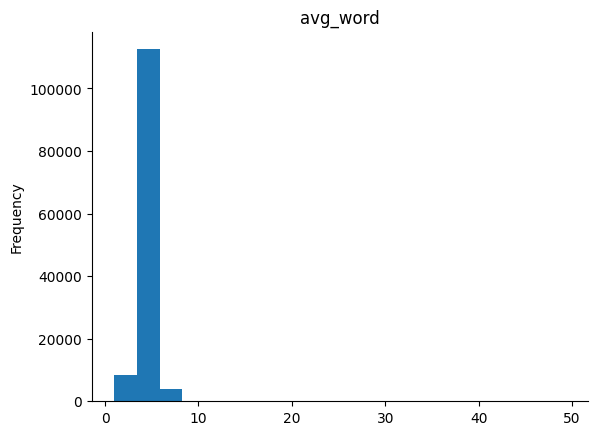

In [ ]:
full_Data['avg_word'].plot(kind='hist', bins=20, title='avg_word')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
#Number of stopwords
stop_words = set(stopwords.words('english'))
full_Data['stopwords'] = full_Data['text'].apply(lambda x: len([x for x in x.split() if x in stop_words]))
full_Data[['text','stopwords']].head()

,text,stopwords
0,My favourite food is anything I didn't have to...,4
1,"Now if he does off himself, everyone will thin...",9
2,WHY THE FUCK IS BAYLESS ISOING,0
3,To make her feel threatened,1
4,Dirty Southern Wankers,0


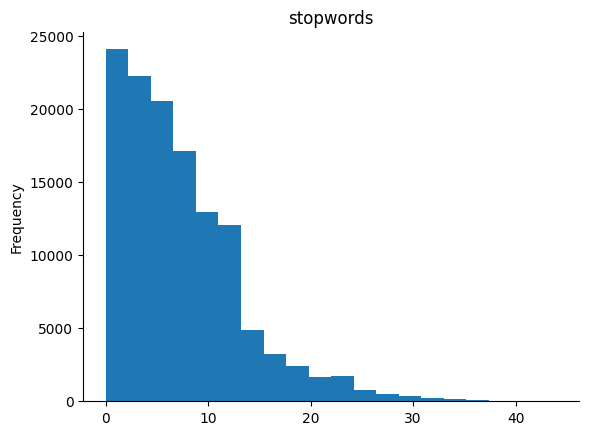

In [ ]:
full_Data['stopwords'].plot(kind='hist', bins=20, title='stopwords')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
#Number of special characters

full_Data['hastags'] = full_Data['text'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
full_Data[['text','hastags']].head()

,text,hastags
0,My favourite food is anything I didn't have to...,0
1,"Now if he does off himself, everyone will thin...",0
2,WHY THE FUCK IS BAYLESS ISOING,0
3,To make her feel threatened,0
4,Dirty Southern Wankers,0


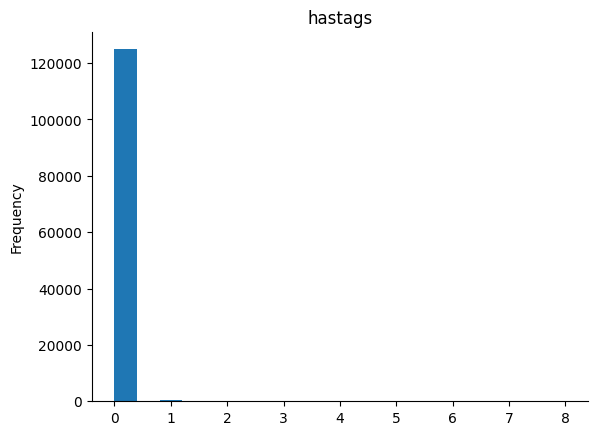

In [ ]:
full_Data['hastags'].plot(kind='hist', bins=20, title='hastags')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
#Number of numerics

full_Data['numerics'] = full_Data['text'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
full_Data[['text','numerics']].head()

,text,numerics
0,My favourite food is anything I didn't have to...,0
1,"Now if he does off himself, everyone will thin...",0
2,WHY THE FUCK IS BAYLESS ISOING,0
3,To make her feel threatened,0
4,Dirty Southern Wankers,0


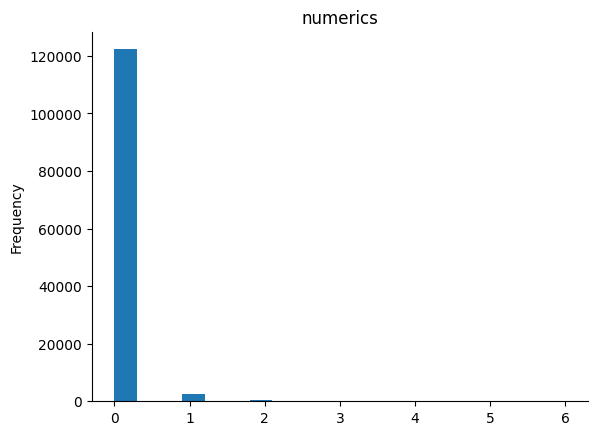

In [ ]:
full_Data['numerics'].plot(kind='hist', bins=20, title='numerics')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
#Number of Uppercase words

full_Data['upper'] = full_Data['text'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
full_Data[['text','upper']].head()

,text,upper
0,My favourite food is anything I didn't have to...,1
1,"Now if he does off himself, everyone will thin...",0
2,WHY THE FUCK IS BAYLESS ISOING,6
3,To make her feel threatened,0
4,Dirty Southern Wankers,0


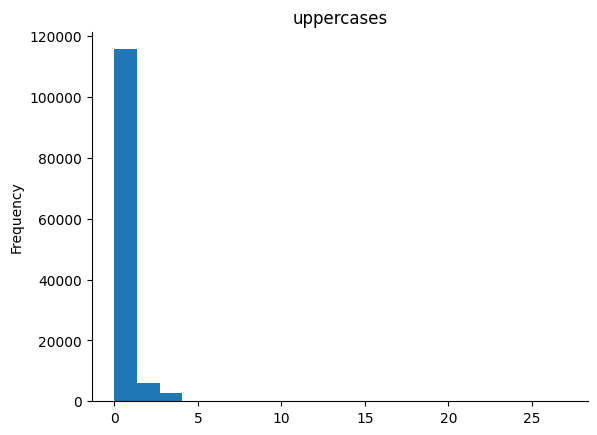

In [ ]:
full_Data['upper'].plot(kind='hist', bins=20, title='uppercases')
plt.gca().spines[['top', 'right',]].set_visible(False)

**Display the Full Data with the Calculatios we've made.
Then drop them becauce they're unecessary for them in the next step.**

In [ ]:
full_Data

,text,emotion,word_count,char_count,avg_word,stopwords,hastags,numerics,upper
0,My favourite food is anything I didn't have to...,neutral,11,59,4.454545,4,0,0,1
1,"Now if he does off himself, everyone will thin...",neutral,20,112,4.650000,9,0,0,0
2,WHY THE FUCK IS BAYLESS ISOING,anger,6,30,4.166667,0,0,0,6
3,To make her feel threatened,fear,5,27,4.600000,1,0,0,0
4,Dirty Southern Wankers,anger,3,22,6.666667,0,0,0,0
...,...,...,...,...,...,...,...,...,...
133708,today was interesting...,surprise,3,24,7.333333,1,0,0,0
133709,is heading off to the fair,sadness,6,26,3.500000,4,0,0,0
133710,@BuddingGenius you dont say,surprise,4,27,6.000000,1,0,0,0
133711,@prinsezha awesome. Wha'dya get her?,surprise,5,36,6.400000,0,0,0,0


In [ ]:
full_Data.drop(['word_count','char_count','avg_word','stopwords','hastags','numerics','upper'], axis=1, inplace=True)
full_Data

,text,emotion
0,My favourite food is anything I didn't have to...,neutral
1,"Now if he does off himself, everyone will thin...",neutral
2,WHY THE FUCK IS BAYLESS ISOING,anger
3,To make her feel threatened,fear
4,Dirty Southern Wankers,anger
...,...,...
133708,today was interesting...,surprise
133709,is heading off to the fair,sadness
133710,@BuddingGenius you dont say,surprise
133711,@prinsezha awesome. Wha'dya get her?,surprise


# **Data Cleaning & PreProcessing**

In [ ]:
lemmatizer = WordNetLemmatizer()
num_words = 200000
oov_token = "<OOV>"
type_padding = "post"
type_truncating ="post"
maxlen = 200

**Class for make the Analysis on our Dataset.
For Manage the Ouliers like: remove emoji, Convert texts to lowercase, remove stop words, remove punctuations, remove special characters links, remove single characters, remove_numbers, remove repeated letters.**

In [ ]:
stopwords_list = ['a','about','above','after','again','against','ain','all','an','and','any',
                  'as','at','below','between','both','by','d','down','during','each','few',
                  'for','from','further','he','her','here','hers','herself','him','himself',
                  'his','how','i','if','in','into','itself','just','ll','m','ma','me','my',
                  'myself','off','other','our','ours','ourselves','out','over','own','she',
                  'so','such','t','than','that','the','their','theirs','them','themselves',
                  'then','there','these','they','this','those','through','to','under','until',
                  'up','ve','very','we','which','while','who','whom','why','with','y','you',
                  'your','yours','yourself','yourselves']

class preprocessing_data():
    def __init__(self, stopwords_list):
      self.stopwords_list = stopwords_list

    def remove_emoji(self, data):
        return [clean(sentence, no_emoji=True) for sentence in data]

    def texts_to_lowercase(self, col_list):
        return [x.lower() for x in col_list]

    def remove_stop_words(self, data, stopwords_list):
        # Define a list of stopwords
        li =[]
        for text in data:
            # Tokenize the text into words
            words = text.split()

            # Filter out the stopwords
            filtered_words = [word for word in words if word.lower() not in stopwords_list]

            # Join the filtered words back into a single string
            filtered_text = ' '.join(filtered_words)
            li.append(filtered_text)
        return li

    def remove_punctuations(self, text):
        translation_table = str.maketrans("", "", string.punctuation)
        return [sentence.translate(translation_table) for sentence in text]

    def remove_special_characters_links(self, data):
        return [re.sub(r'http\S+|www.\S+', '', sentence).strip() for sentence in data]

    def remove_single_characters(self, data):
        li = [re.sub(r'\b\w\b', '', text) for text in data]
        li = [re.sub(' +', ' ', text).strip() for text in li]
        return li

    def remove_numbers(self, data):
        return [re.sub(r'\d+', '', sentence).strip() for sentence in data]

    def remove_repeated_letters(self, data):
        return [re.sub(r'([a-zA-Z])\1{2,}', r'\1', sentence).strip() for sentence in data]

    def __call__(self, input_data, type_processing='lstm'):
            x1 = self.remove_emoji(input_data['text'])
            x2 = self.texts_to_lowercase(x1)
            if type_processing == 'lstm':
                x3 = self.remove_stop_words(x2, stopwords_list)
                x4 = self.remove_punctuations(x3)
                x5 = self.remove_special_characters_links(x4)
                x6 = self.remove_single_characters(x5)
                x7 = self.remove_numbers(x6)
                input_data['text'] = self.remove_repeated_letters(x7)
                return  input_data

            elif type_processing == 'roberta':
                x3 = self.remove_special_characters_links(x2)
                x4 = self.remove_single_characters(x3)
                x5 = self.remove_numbers(x4)
                input_data['text']  = self.remove_repeated_letters(x5)
                return input_data

preprocessor = preprocessing_data(stopwords_list)
final_dataframe_after_preprocessing = preprocessor(full_Data, type_processing='lstm')

**It was also necessary to remove rare words from the dataset, which are considered meaningless or misspelled, and which negatively affect the overall data quality.**

In [ ]:
#Rare words removal
freq = pd.Series(' '.join(final_dataframe_after_preprocessing['text']).split()).value_counts()[-26702:] #words that occurs once
freq

higgins          1
navigation       1
interface        1
sine             1
beau             1
                ..
desync           1
restauranteur    1
firstworld       1
sseason          1
iscreamshinki    1
Length: 26702, dtype: int64

In [ ]:
freq = list(freq.index)
final_dataframe_after_preprocessing['text'] = final_dataframe_after_preprocessing['text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
final_dataframe_after_preprocessing['text'].head()

0    favourite food is anything didnt have cook myself
1    now does himself everyone will think hes havin...
2                                      fuck is bayless
3                                 make feel threatened
4                               dirty southern wankers
Name: text, dtype: object

In [ ]:
freq = pd.Series(' '.join(final_dataframe_after_preprocessing['text']).split()).value_counts()[-26702:] #words that occurs once
freq

feel       43350
of         29671
it         23990
feeling    22443
is         19186
           ...  
arnav          1
kwok           1
yakezie        1
prudes         1
coys           1
Length: 25293, dtype: int64

In [ ]:
final_dataframe_after_preprocessing.to_csv('without_rare_words.csv', index=False)

**Now our data is clean from outliers and ready for the data visualization step**

# **Data Visualization** #

**The importance of Data Visualization:**

-Make Text Data Easy to Understand
Our brains process visual data 60,000 times faster than texts and numbers. Text visualization examples effectively simplify complex data and communicate ideas and concepts to team managers.

-Discover Hidden Trends and Patterns
You can easily analyze and visualize insights over time to detect fluctuations, and quickly find the root cause.

-Extracting reliable insights from qualitative data sets, such as keywords, should never be an Achilles Heel for you.

In [ ]:
from matplotlib.colors import ListedColormap

In [ ]:
#Most common words in all of the text

def plot_wordcloud(text, mask=None, max_words=400, max_font_size=120, figure_size=(24.0,16.0),
                   title = None, title_size=40, image_color=False):


    wordcloud = WordCloud(background_color='white',
                    max_words = max_words,
                    max_font_size = max_font_size,
                    random_state = 42,
                    mask = mask)
    wordcloud.generate(text)

    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'green',
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()

**This diagram is a word cloud, a visual representation of text data where the size of each word indicates its frequency within a given body of text.
The word cloud visually prioritizes the importance of different words based on their frequency in the text data.**

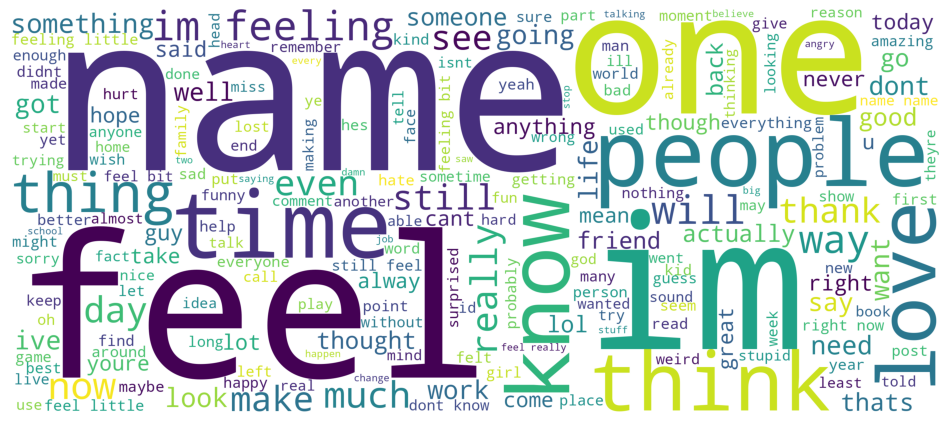

In [ ]:
plt.subplots(figsize=(12,9))
wordcloud = WordCloud(
                          background_color='white',
                          width=3000,
                          height=1300,
                          max_words=200,
                         ).generate(" ".join(final_dataframe_after_preprocessing.text))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('text.png')
plt.show()

In [ ]:
neutral_sent = final_dataframe_after_preprocessing[final_dataframe_after_preprocessing['emotion']=='neutral']
joy_sent = final_dataframe_after_preprocessing[final_dataframe_after_preprocessing['emotion']=='joy']
sadness_sent = final_dataframe_after_preprocessing[final_dataframe_after_preprocessing['emotion']=='sadness']
surprise_sent = final_dataframe_after_preprocessing[final_dataframe_after_preprocessing['emotion']=='surprise']
fear_sent = final_dataframe_after_preprocessing[final_dataframe_after_preprocessing['emotion']=='fear']
anger_sent = final_dataframe_after_preprocessing[final_dataframe_after_preprocessing['emotion']=='anger']

**This figure of DoNut Plot have two subplots:**
1. Table Explanation: The table on the left side lists the top 20 most common words and their frequency counts in a given text dataset.
The table provides a detailed numerical count of each word's occurrence.
2. Donut Plot Explanation: The donut plot on the right visually represents the data from the table. Each segment of the donut plot corresponds to a word from the table, and the size of each segment reflects the frequency of that word.
This visualization allows easy comparison of the frequency of the most common words in the sentiment text for each emotion we have.

**The donut plot offers a visual summary, making it easy to see the relative frequencies of these common words at a glance.
This combination of textual and visual data representation helps in understanding which words are most prevalent in the dataset.**

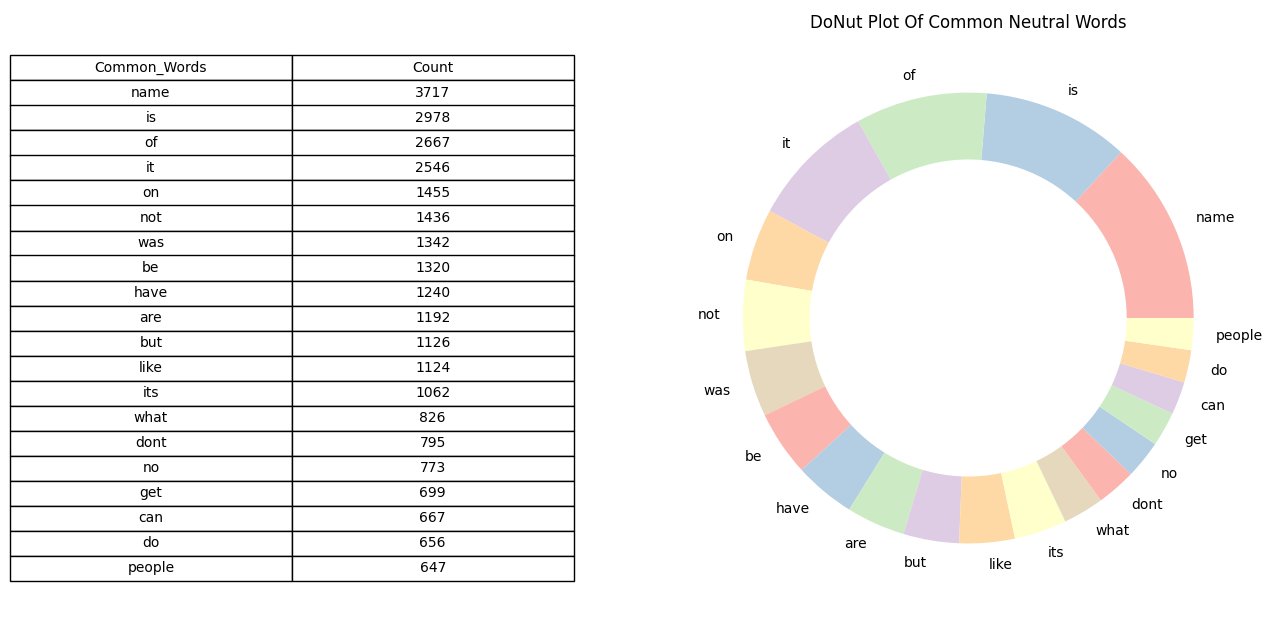

In [ ]:
# Assuming temp_neu is your DataFrame
top_words_count1 = neutral_sent['text'].str.split(expand=True).stack().value_counts().head(20)
temp_neutral = pd.DataFrame({'Common_Words': top_words_count1.index, 'Count': top_words_count1.values})

fig, ax = plt.subplots(1, 2, figsize=(16, 8))  # 1 row, 2 columns

# Subplot 1: Table
ax[0].axis('tight')
ax[0].axis('off')
table = ax[0].table(cellText=temp_neutral.values,
                    colLabels=temp_neutral.columns,
                    cellLoc = 'center',
                    loc='center')

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.5)

# Subplot 2: Pie chart
my_circle=plt.Circle((0,0), 0.7, color='white')
ax[1].pie(temp_neutral['Count'], labels=temp_neutral.Common_Words, colors=sns.color_palette("Pastel1", 7))
ax[1].add_artist(my_circle)
ax[1].set_title('DoNut Plot Of Common Neutral Words')

plt.show()

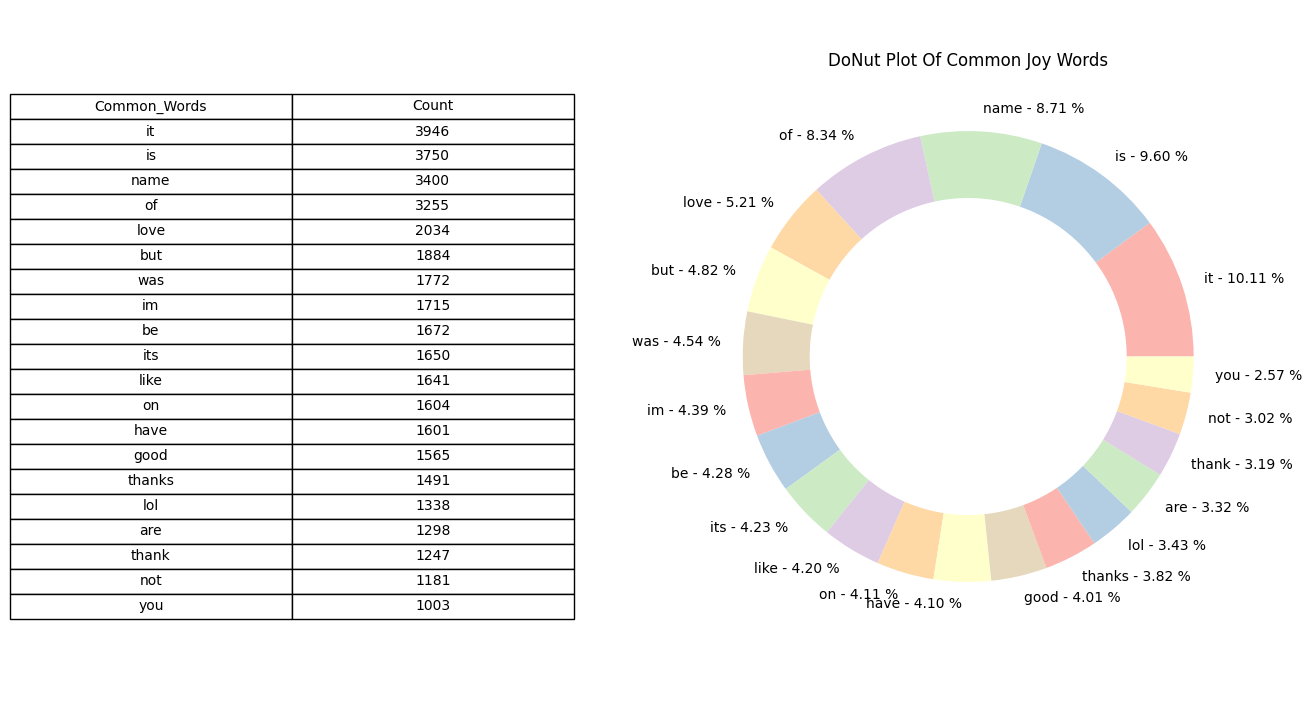

In [ ]:
# Assuming temp_joy is your DataFrame
top_words_count2 = joy_sent['text'].str.split(expand=True).stack().value_counts().head(20)
temp_joy = pd.DataFrame({'Common_Words': top_words_count2.index, 'Count': top_words_count2.values})

fig, ax = plt.subplots(1, 2, figsize=(16, 9))  # 1 row, 2 columns

# Subplot 1: Table
ax[0].axis('tight')
ax[0].axis('off')
table = ax[0].table(cellText=temp_joy.values,
                    colLabels=temp_joy.columns,
                    cellLoc = 'center',
                    loc='center')

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.5)

# Subplot 2: Pie chart
my_circle=plt.Circle((0,0), 0.7, color='white')
# Calculate percentage
percents = 100.*temp_joy['Count']/temp_joy['Count'].sum()
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(temp_joy.Common_Words, percents)]

ax[1].pie(temp_joy['Count'], labels=labels, colors=sns.color_palette("Pastel1", 7))
ax[1].add_artist(my_circle)
ax[1].set_title('DoNut Plot Of Common Joy Words')

plt.show()

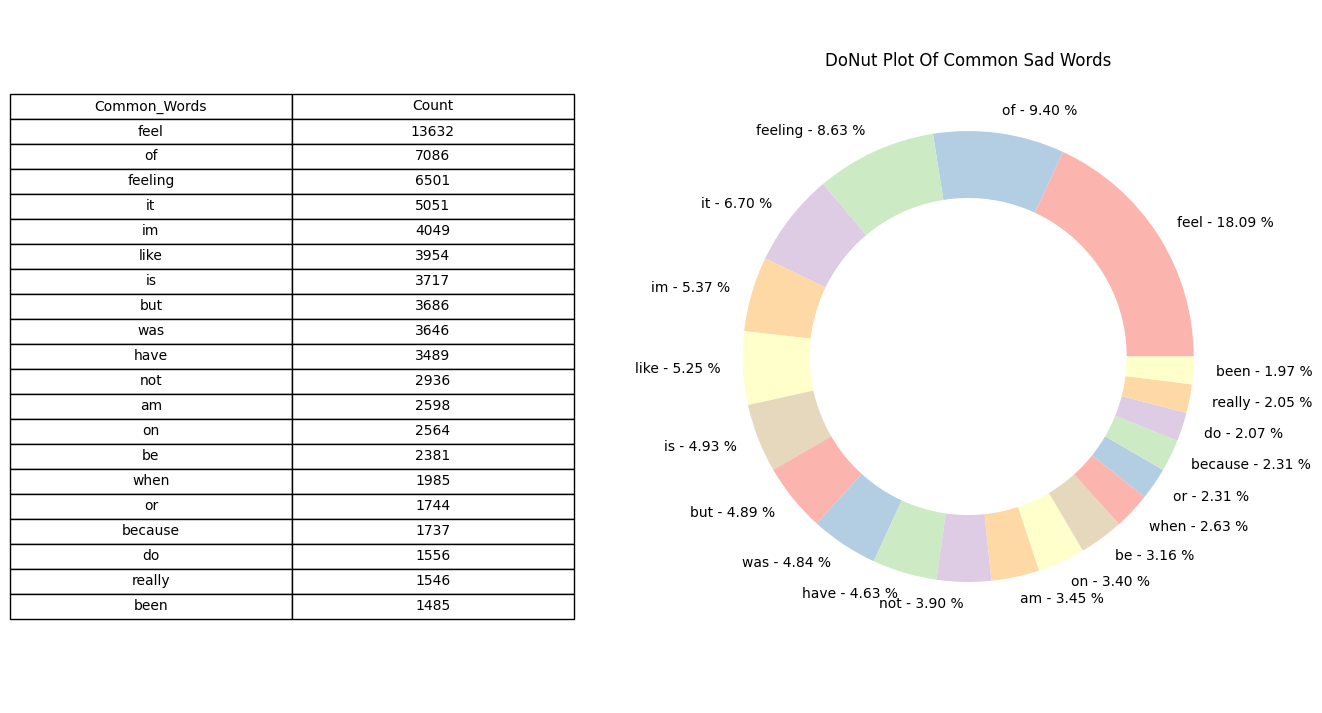

In [ ]:
# Assuming temp_sad is your DataFrame
top_words_count3 = sadness_sent['text'].str.split(expand=True).stack().value_counts().head(20)
temp_sad = pd.DataFrame({'Common_Words': top_words_count3.index, 'Count': top_words_count3.values})

fig, ax = plt.subplots(1, 2, figsize=(16, 9))  # 1 row, 2 columns

# Subplot 1: Table
ax[0].axis('tight')
ax[0].axis('off')
table = ax[0].table(cellText=temp_sad.values,
                    colLabels=temp_sad.columns,
                    cellLoc = 'center',
                    loc='center')

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.5)

# Subplot 2: Pie chart
my_circle=plt.Circle((0,0), 0.7, color='white')
# Calculate percentage
percents = 100.*temp_sad['Count']/temp_sad['Count'].sum()
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(temp_sad.Common_Words, percents)]

ax[1].pie(temp_sad['Count'], labels=labels, colors=sns.color_palette("Pastel1", 7))
ax[1].add_artist(my_circle)
ax[1].set_title('DoNut Plot Of Common Sad Words')

plt.show()

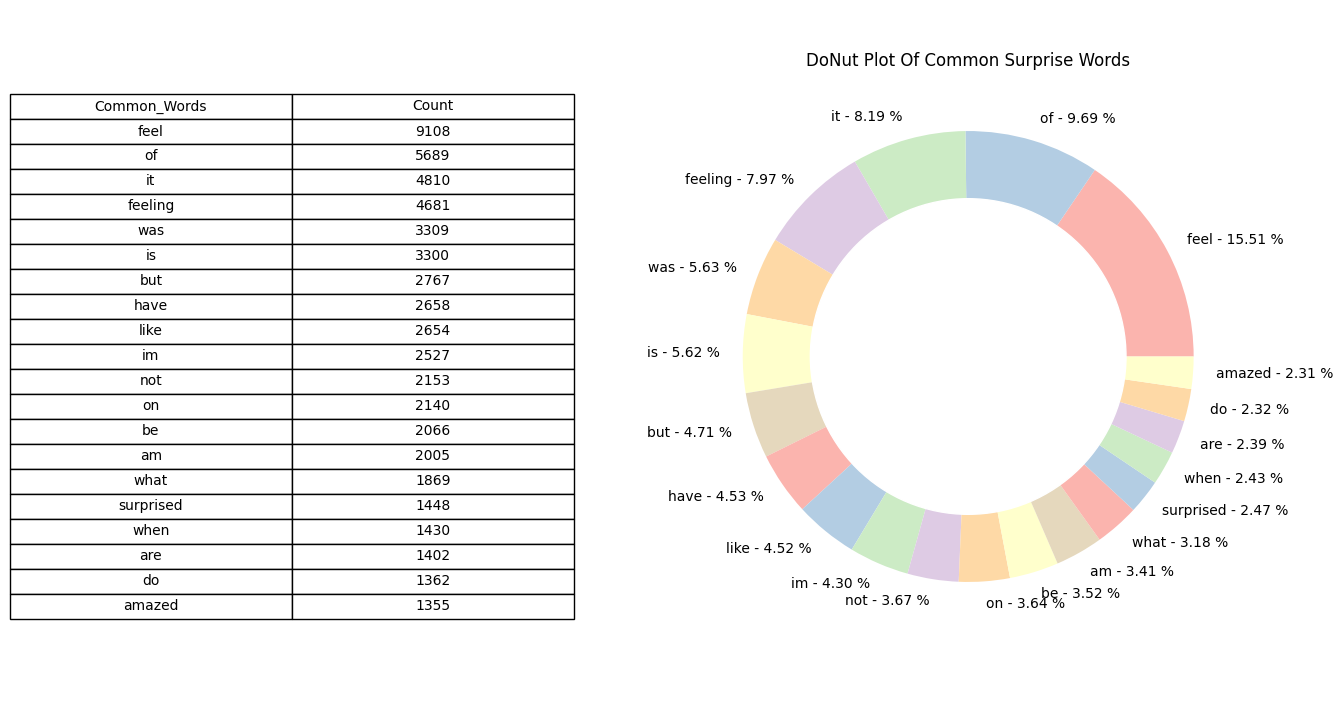

In [ ]:
# Assuming temp_sur is your DataFrame
top_words_count4 = surprise_sent['text'].str.split(expand=True).stack().value_counts().head(20)
temp_surprise = pd.DataFrame({'Common_Words': top_words_count4.index, 'Count': top_words_count4.values})

fig, ax = plt.subplots(1, 2, figsize=(16, 9))  # 1 row, 2 columns

# Subplot 1: Table
ax[0].axis('tight')
ax[0].axis('off')
table = ax[0].table(cellText=temp_surprise.values,
                    colLabels=temp_surprise.columns,
                    cellLoc = 'center',
                    loc='center')

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.5)

# Subplot 2: Pie chart
my_circle=plt.Circle((0,0), 0.7, color='white')
# Calculate percentage
percents = 100.*temp_surprise['Count']/temp_surprise['Count'].sum()
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(temp_surprise.Common_Words, percents)]

ax[1].pie(temp_surprise['Count'], labels=labels, colors=sns.color_palette("Pastel1", 7))
ax[1].add_artist(my_circle)
ax[1].set_title('DoNut Plot Of Common Surprise Words')

plt.show()

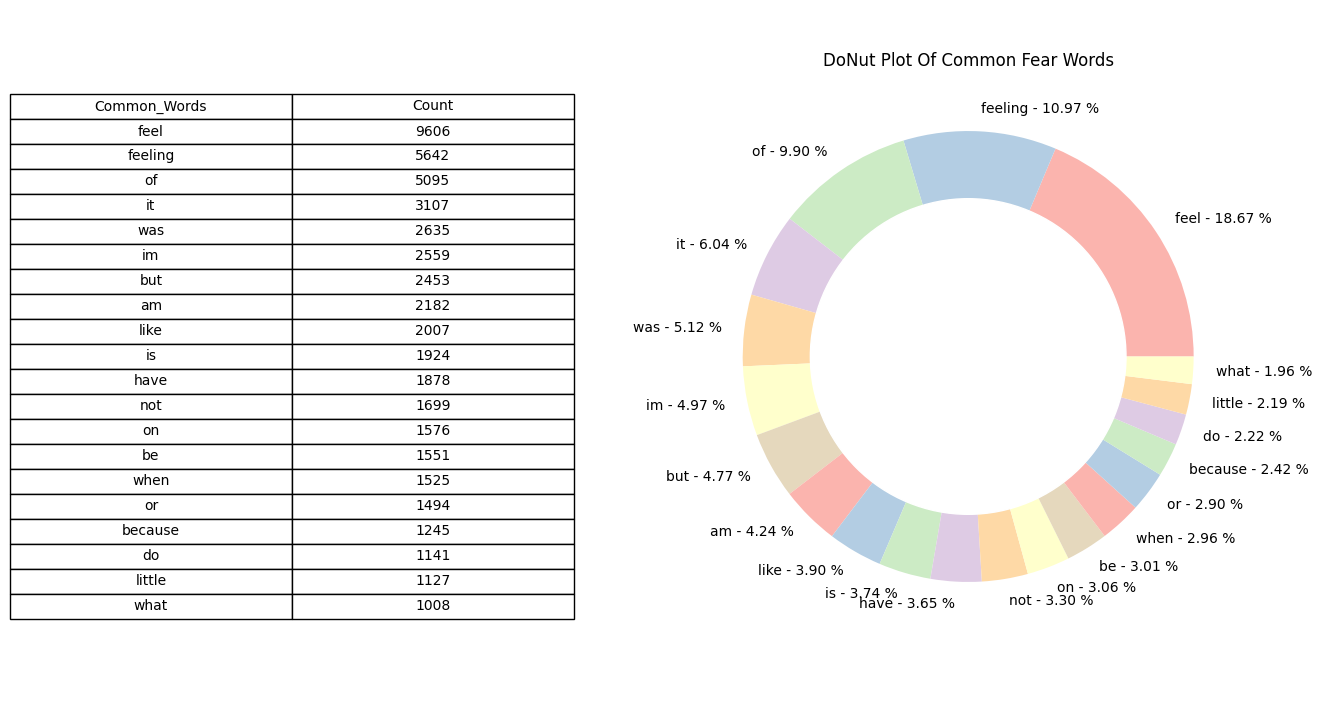

In [ ]:
# Assuming temp_fear is your DataFrame
top_words_count5 = fear_sent['text'].str.split(expand=True).stack().value_counts().head(20)
temp_fear = pd.DataFrame({'Common_Words': top_words_count5.index, 'Count': top_words_count5.values})

fig, ax = plt.subplots(1, 2, figsize=(16, 9))  # 1 row, 2 columns

# Subplot 1: Table
ax[0].axis('tight')
ax[0].axis('off')
table = ax[0].table(cellText=temp_fear.values,
                    colLabels=temp_fear.columns,
                    cellLoc = 'center',
                    loc='center')

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.5)

# Subplot 2: Pie chart
my_circle=plt.Circle((0,0), 0.7, color='white')
# Calculate percentage
percents = 100.*temp_fear['Count']/temp_fear['Count'].sum()
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(temp_fear.Common_Words, percents)]

ax[1].pie(temp_fear['Count'], labels=labels, colors=sns.color_palette("Pastel1", 7))
ax[1].add_artist(my_circle)
ax[1].set_title('DoNut Plot Of Common Fear Words')

plt.show()

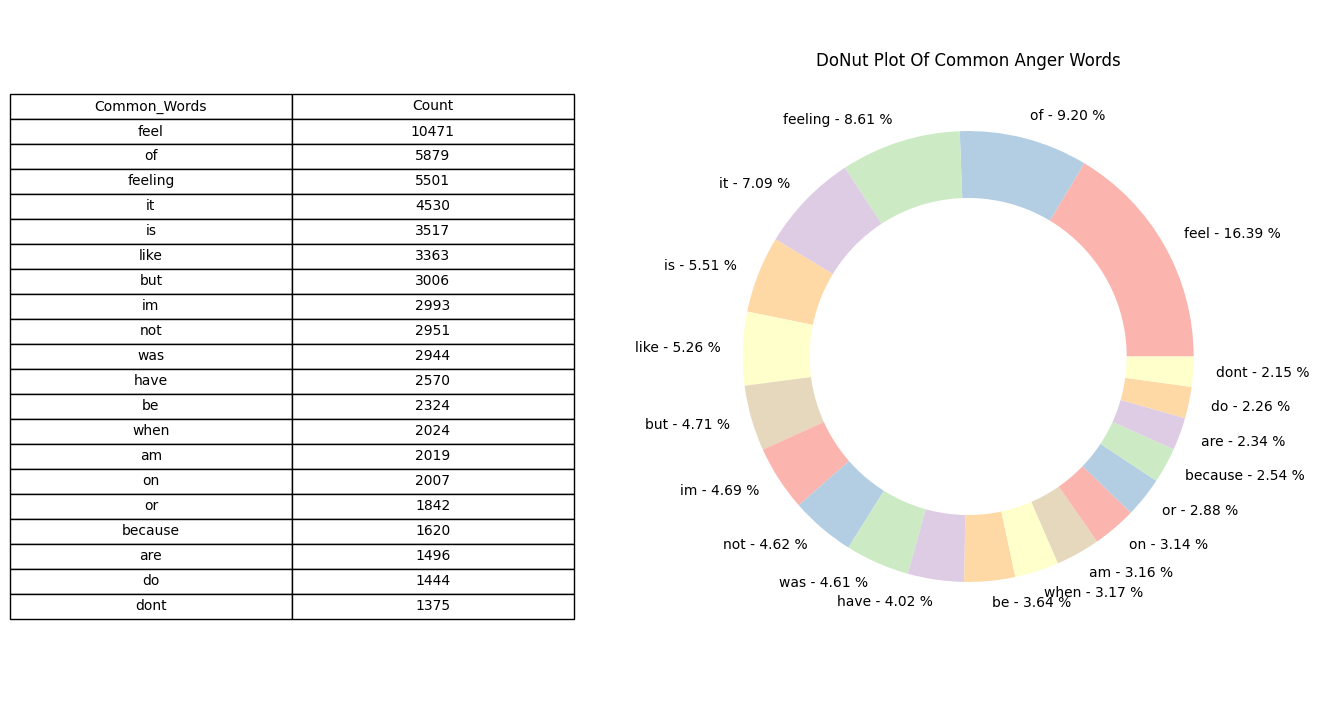

In [ ]:
# Assuming temp_anger is your DataFrame
top_words_count6 = anger_sent['text'].str.split(expand=True).stack().value_counts().head(20)
temp_anger = pd.DataFrame({'Common_Words': top_words_count6.index, 'Count': top_words_count6.values})

fig, ax = plt.subplots(1, 2, figsize=(16, 9))  # 1 row, 2 columns

# Subplot 1: Table
ax[0].axis('tight')
ax[0].axis('off')
table = ax[0].table(cellText=temp_anger.values,
                    colLabels=temp_anger.columns,
                    cellLoc = 'center',
                    loc='center')

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.5)

# Subplot 2: Pie chart
my_circle=plt.Circle((0,0), 0.7, color='white')
# Calculate percentage
percents = 100.*temp_anger['Count']/temp_anger['Count'].sum()
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(temp_anger.Common_Words, percents)]

ax[1].pie(temp_anger['Count'], labels=labels, colors=sns.color_palette("Pastel1", 7))
ax[1].add_artist(my_circle)
ax[1].set_title('DoNut Plot Of Common Anger Words')

plt.show()

**This table lists the top 20 most common words and their frequency counts in a given text dataset. The table provides a detailed numerical count of each word's occurrence.**

In [ ]:
#Most common data words
top_data_word_count = final_dataframe_after_preprocessing['text'].str.split(expand=True).stack().value_counts().head(20)
temp_data = pd.DataFrame({'word': top_data_word_count.index, 'count': top_data_word_count.values})
styled_temp_data = temp_data.style.background_gradient(cmap='Reds')
styled_temp_data

,word,count
0,feel,43350
1,of,29671
2,it,23990
3,feeling,22443
4,is,19186
5,was,15648
6,but,14922
7,like,14743
8,im,14467
9,have,13436


**This diagram of Bar Charts shows a series of the frequency of common words across different categories of emotions.
Each chart highlights the most frequent words in texts associated with different emotional contexts in all of data and in each emotion.**

In [ ]:
#convert series to dataframe

top = pd.DataFrame({'word':top_data_word_count.index, 'count':top_data_word_count.values})

neu = pd.DataFrame({'word':top_words_count1.index, 'count':top_words_count1.values})
joy = pd.DataFrame({'word':top_words_count2.index, 'count':top_words_count2.values})
sad = pd.DataFrame({'word':top_words_count3.index, 'count':top_words_count3.values})
sur = pd.DataFrame({'word':top_words_count4.index, 'count':top_words_count4.values})
fea = pd.DataFrame({'word':top_words_count5.index, 'count':top_words_count5.values})
ang = pd.DataFrame({'word':top_words_count6.index, 'count':top_words_count6.values})

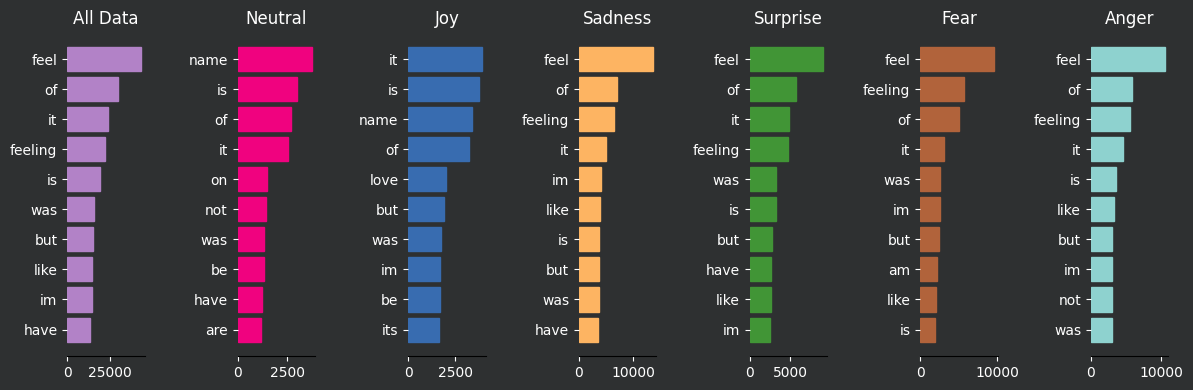

In [ ]:
top_fig =top.iloc[:10]
neu_fig =neu.iloc[:10]
joy_fig = joy.iloc[:10]
sad_fig = sad.iloc[:10]
sur_fig = sur.iloc[:10]
fea_fig = fea.iloc[:10]
ang_fig = ang.iloc[:10]
fig, (ax0, ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(1,7, figsize=(12, 4))
# horizontal barplot:
ax0.barh(top_fig["word"], top_fig["count"],
        color = "#B282C7",
        edgecolor = "#B282C7")
ax1.barh(neu_fig["word"], neu_fig["count"],
        color = "#f0027f",
        edgecolor = "#f0027f")
ax2.barh(joy_fig["word"], joy_fig["count"],
        color = "#386cb0",
        edgecolor = "#386cb0")
ax3.barh(sad_fig["word"], sad_fig["count"],
        color = "#fdb462",
        edgecolor = "#fdb462")
ax4.barh(sur_fig["word"], sur_fig["count"],
        color = "#419536",
        edgecolor = "#419536")
ax5.barh(fea_fig["word"], fea_fig["count"],
        color = "#B1633B",
        edgecolor = "#B1633B")
ax6.barh(ang_fig["word"], ang_fig["count"],
        color = "#8ED2CF",
        edgecolor = "#8ED2CF")
# title:
ax0.set_title("All Data")
ax1.set_title("Neutral")
ax2.set_title("Joy")
ax3.set_title("Sadness")
ax4.set_title("Surprise")
ax5.set_title("Fear")
ax6.set_title("Anger")

for ax in fig.axes:
    ax.invert_yaxis()
    ax.grid(False)
    ax.title.set_color('white')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
    ax.set_facecolor('#2E3031')
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
# fig background color:
fig.patch.set_facecolor('#2E3031')
# layout:
fig.tight_layout()
plt.show()

In [ ]:
#Number of most common words characters

top['char_count'] = top['word'].str.len()
top[['word','char_count']].head(5)

,word,char_count
0,feel,4
1,of,2
2,it,2
3,feeling,7
4,is,2


In [ ]:
#Number of most common neutral words characters

neu['char_count'] = neu['word'].str.len()
neu[['word','char_count']].head(5)

,word,char_count
0,name,4
1,is,2
2,of,2
3,it,2
4,on,2


In [ ]:
#Number of most common joy words characters

joy['char_count'] = joy['word'].str.len()
joy[['word','char_count']].head(5)

,word,char_count
0,it,2
1,is,2
2,name,4
3,of,2
4,love,4


In [ ]:
#Number of most common sadness words characters

sad['char_count'] = sad['word'].str.len()
sad[['word','char_count']].head(5)

,word,char_count
0,feel,4
1,of,2
2,feeling,7
3,it,2
4,im,2


In [ ]:
#Number of most common surprise words characters
sur['char_count'] = sur['word'].str.len()
sur[['word','char_count']].head(5)

,word,char_count
0,feel,4
1,of,2
2,it,2
3,feeling,7
4,was,3


In [ ]:
#Number of most common fear words characters
fea['char_count'] = fea['word'].str.len()
fea[['word','char_count']].head(5)

,word,char_count
0,feel,4
1,feeling,7
2,of,2
3,it,2
4,was,3


In [ ]:
#Number of most common anger words characters
ang['char_count'] = ang['word'].str.len()
ang[['word','char_count']].head(5)

,word,char_count
0,feel,4
1,of,2
2,feeling,7
3,it,2
4,is,2


**Finally Drop the unecessary columns.**

In [ ]:
top.drop(['char_count'], axis=1, inplace=True)

neu.drop(['char_count'], axis=1, inplace=True)
joy.drop(['char_count'], axis=1, inplace=True)
sad.drop(['char_count'], axis=1, inplace=True)
sur.drop(['char_count'], axis=1, inplace=True)
fea.drop(['char_count'], axis=1, inplace=True)
ang.drop(['char_count'], axis=1, inplace=True)